#  Creating new features 

## Getting additional features from the Alpha vantage API 

### Bitcoin FCAS Rating 

In [1]:
# imports 
import requests
import pandas as pd 

In [2]:
API_key = 'BPXVULLGKWW3Z16Y'

In [3]:
# Crypto rating 
symbol = 'BTC'
url = f'https://www.alphavantage.co/query?function=CRYPTO_RATING&symbol={symbol}&apikey={API_key}'
r = requests.get(url)
data = r.json()
df = pd.DataFrame(data)
print(df)

Empty DataFrame
Columns: []
Index: []


## Getting blockchain features from blockchain.info API 

### mining difficulty

In [4]:
url = 'https://blockchain.info/q/getdifficulty'
r = requests.get(url)
mining_difficulty = r.json()

mining_difficulty

24371874614345.0

### Block count

In [5]:
url = 'https://blockchain.info/q/getblockcount'
r = requests.get(url)
block_count = r.json()
block_count

718517

## Transforming features to get technical analysis features

### Getting the price and volume data from financialmodelingprep.com API 

In [6]:
api_key='a58413697e8263de9c95cab92049ea3f'
symbol='BTCUSD'
query=f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}'
response=requests.get(query)
df = pd.DataFrame(response.json()['historical'])
df

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2022-01-12,42776.830200,42942.709400,42588.767200,42839.807600,42839.807600,2.654798e+10,2.654798e+10,62.97740,0.147,42790.42807,"January 12, 22",0.00147
1,2022-01-11,41861.042700,42148.080100,41703.983200,42148.080100,42148.080100,3.467735e+10,3.467735e+10,287.03740,0.686,42000.04780,"January 11, 22",0.00686
2,2022-01-10,41932.756900,42253.057500,41772.873600,41919.103900,41919.103900,2.200912e+10,2.200912e+10,-13.65300,-0.033,41981.67833,"January 10, 22",-0.00033
3,2022-01-09,41808.563900,42710.280700,41473.902200,41963.416500,41963.416500,2.250029e+10,2.250029e+10,154.85260,0.370,42049.19980,"January 09, 22",0.00370
4,2022-01-08,41578.373000,42270.547300,40465.070800,41862.367700,41862.367700,2.811234e+10,2.811234e+10,283.99470,0.683,41532.66193,"January 08, 22",0.00683
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2017-01-17,830.945984,910.560974,830.796021,907.937988,907.937988,1.550950e+08,1.550950e+08,76.99200,9.266,883.09833,"January 17, 17",0.09266
1822,2017-01-16,821.783020,834.530029,820.270996,831.533997,831.533997,8.275520e+07,8.275520e+07,9.75098,1.187,828.77834,"January 16, 17",0.01187
1823,2017-01-15,818.142029,823.307007,812.870972,821.797974,821.797974,7.101360e+07,7.101360e+07,3.65595,0.447,819.32532,"January 15, 17",0.00447
1824,2017-01-14,825.142029,835.085022,812.455994,818.411987,818.411987,9.306330e+07,9.306330e+07,-6.73004,-0.816,821.98433,"January 14, 17",-0.00816


In [7]:
df.head()

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2022-01-12,42776.8302,42942.7094,42588.7672,42839.8076,42839.8076,2.654798e+10,2.654798e+10,62.9774,0.147,42790.42807,"January 12, 22",0.00147
1,2022-01-11,41861.0427,42148.0801,41703.9832,42148.0801,42148.0801,3.467735e+10,3.467735e+10,287.0374,0.686,42000.04780,"January 11, 22",0.00686
2,2022-01-10,41932.7569,42253.0575,41772.8736,41919.1039,41919.1039,2.200912e+10,2.200912e+10,-13.6530,-0.033,41981.67833,"January 10, 22",-0.00033
3,2022-01-09,41808.5639,42710.2807,41473.9022,41963.4165,41963.4165,2.250029e+10,2.250029e+10,154.8526,0.370,42049.19980,"January 09, 22",0.00370
4,2022-01-08,41578.3730,42270.5473,40465.0708,41862.3677,41862.3677,2.811234e+10,2.811234e+10,283.9947,0.683,41532.66193,"January 08, 22",0.00683


In [8]:
df['date']= pd.to_datetime(df['date'])

In [9]:
df.set_index('date', inplace = True)

### Computing moving averages

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

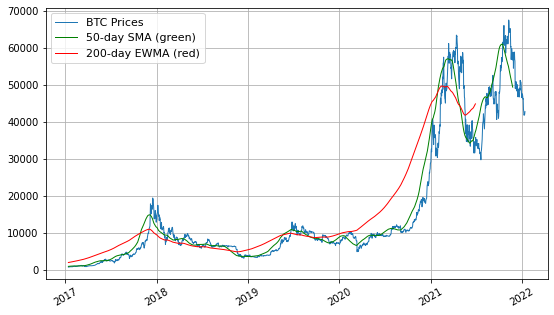

In [10]:
# Moving Averages Code

# Load the necessary packages and modules
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance
import pandas as pd


# Simple Moving Average 
def SMA(data, ndays): 
    SMA = pd.Series(data['close'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
    EMA = pd.Series(data['close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

# Retrieve the BTC data from our dataset:
data = df
close = data['close']

# Compute the 50-day 
n = 50
SMA_BTC = SMA(data,n)
SMA_BTC = SMA_BTC.dropna()
SMA = SMA_BTC['SMA']

# Compute the 200-day EWMA 
ew = 200
EWMA_BTC = EWMA(data,ew)
EWMA_BTC = EWMA_BTC.dropna()
EWMA = EWMA_BTC['EWMA_200']

# Plotting the BTC Price Series chart and Moving Averages below
plt.figure(figsize=(9,5))
plt.plot(data['close'],lw=1, label='BTC Prices')
plt.plot(SMA,'g',lw=1, label='50-day SMA (green)')
plt.plot(EWMA,'r', lw=1, label='200-day EWMA (red)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

In [11]:
df.drop(columns = ['label'])

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,changeOverTime
date,,,,,,,,,,,
2022-01-12,42776.830200,42942.709400,42588.767200,42839.807600,42839.807600,2.654798e+10,2.654798e+10,62.97740,0.147,42790.42807,0.00147
2022-01-11,41861.042700,42148.080100,41703.983200,42148.080100,42148.080100,3.467735e+10,3.467735e+10,287.03740,0.686,42000.04780,0.00686
2022-01-10,41932.756900,42253.057500,41772.873600,41919.103900,41919.103900,2.200912e+10,2.200912e+10,-13.65300,-0.033,41981.67833,-0.00033
2022-01-09,41808.563900,42710.280700,41473.902200,41963.416500,41963.416500,2.250029e+10,2.250029e+10,154.85260,0.370,42049.19980,0.00370
2022-01-08,41578.373000,42270.547300,40465.070800,41862.367700,41862.367700,2.811234e+10,2.811234e+10,283.99470,0.683,41532.66193,0.00683
...,...,...,...,...,...,...,...,...,...,...,...
2017-01-17,830.945984,910.560974,830.796021,907.937988,907.937988,1.550950e+08,1.550950e+08,76.99200,9.266,883.09833,0.09266
2017-01-16,821.783020,834.530029,820.270996,831.533997,831.533997,8.275520e+07,8.275520e+07,9.75098,1.187,828.77834,0.01187
2017-01-15,818.142029,823.307007,812.870972,821.797974,821.797974,7.101360e+07,7.101360e+07,3.65595,0.447,819.32532,0.00447


### Bollinger bands

<AxesSubplot:xlabel='date'>

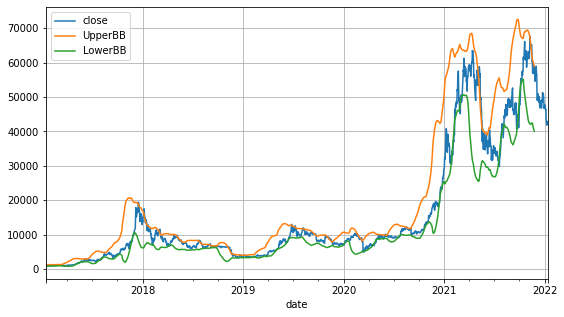

In [12]:
# Compute the Bollinger Bands 
def BBANDS(data, window=n):
    MA = data.close.rolling(window=n).mean()
    SD = data.close.rolling(window=n).std()
    data['UpperBB'] = MA + (2 * SD) 
    data['LowerBB'] = MA - (2 * SD)
    return data
 
# Compute the Bollinger Bands for BTC using the 50-day Moving average
n = 50
BTC_BBANDS = BBANDS(data, n)
#print(BTC_BBANDS)

# Create the plot
pd.concat([BTC_BBANDS.close,BTC_BBANDS.UpperBB,BTC_BBANDS.LowerBB],axis=1).plot(figsize=(9,5),grid=True)

### RSI

In [13]:
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [14]:
rsi = rsi(df)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

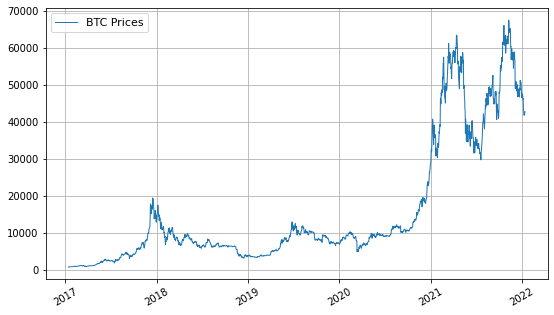

In [15]:
plt.figure(figsize=(9,5))
plt.plot(data['close'],lw=1, label='BTC Prices')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

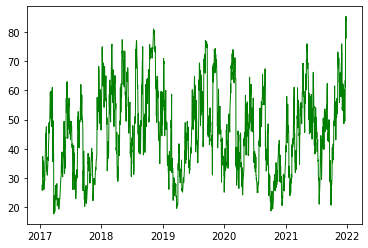

In [16]:
plt.plot(rsi,'g',lw=1, label='50-day SMA (green)')

In [17]:
df['rsi'] = rsi.tolist()

In [18]:
df

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,UpperBB,LowerBB,rsi
date,,,,,,,,,,,,,,,
2022-01-12,42776.830200,42942.709400,42588.767200,42839.807600,42839.807600,2.654798e+10,2.654798e+10,62.97740,0.147,42790.42807,"January 12, 22",0.00147,NaN,NaN,NaN
2022-01-11,41861.042700,42148.080100,41703.983200,42148.080100,42148.080100,3.467735e+10,3.467735e+10,287.03740,0.686,42000.04780,"January 11, 22",0.00686,NaN,NaN,NaN
2022-01-10,41932.756900,42253.057500,41772.873600,41919.103900,41919.103900,2.200912e+10,2.200912e+10,-13.65300,-0.033,41981.67833,"January 10, 22",-0.00033,NaN,NaN,NaN
2022-01-09,41808.563900,42710.280700,41473.902200,41963.416500,41963.416500,2.250029e+10,2.250029e+10,154.85260,0.370,42049.19980,"January 09, 22",0.00370,NaN,NaN,NaN
2022-01-08,41578.373000,42270.547300,40465.070800,41862.367700,41862.367700,2.811234e+10,2.811234e+10,283.99470,0.683,41532.66193,"January 08, 22",0.00683,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-17,830.945984,910.560974,830.796021,907.937988,907.937988,1.550950e+08,1.550950e+08,76.99200,9.266,883.09833,"January 17, 17",0.09266,1281.970226,807.535687,37.329518
2017-01-16,821.783020,834.530029,820.270996,831.533997,831.533997,8.275520e+07,8.275520e+07,9.75098,1.187,828.77834,"January 16, 17",0.01187,1275.916982,797.908689,27.055836
2017-01-15,818.142029,823.307007,812.870972,821.797974,821.797974,7.101360e+07,7.101360e+07,3.65595,0.447,819.32532,"January 15, 17",0.00447,1264.588066,791.196327,26.071180


### Standard deviation and volatility

In [19]:
import statistics as st
import numpy as np

In [20]:
# Calculate daily log return 
df['returns'] = (np.log(df.close /
    df.close.shift(-1)))

In [21]:
# calculate daily standard deviation of returns
daily_std = np.std(df.returns)

In [22]:
df.sort_index(inplace = True)

In [23]:
n= 14
# volatility is the 14 days standard deviation 
def volatility(df,n):
    volatil = df.close.rolling(n).std(ddof=0)
    return volatil 
df['volatility'] = volatility(df,n)
volatility(df,n)

date
2017-01-13            NaN
2017-01-14            NaN
2017-01-15            NaN
2017-01-16            NaN
2017-01-17            NaN
                 ...     
2022-01-08    2612.617804
2022-01-09    2644.944028
2022-01-10    2532.626061
2022-01-11    2373.697445
2022-01-12    2290.659982
Name: close, Length: 1826, dtype: float64

### Moving Average Convergence Divergence (MACD)

NameError: name 'exp3' is not defined

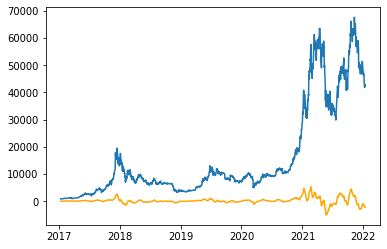

In [24]:
def macd(df):
    exp1 = df.close.ewm(span=12, adjust=False).mean()
    exp2 = df.close.ewm(span=26, adjust=False).mean()
    exp3 = df.close.ewm(span=9, adjust=False).mean()
    macd = exp1-exp2
    return macd
plt.plot(df.close, label='BTC')
plt.plot(macd(df), label='BTC MACD', color='orange')
plt.plot(exp3, label='Signal Line', color='Magenta')
plt.legend(loc='upper left')
plt.show()


In [ ]:
df['macd'] = macd(df)

In [ ]:
df['macd'][0:26] = 'NaN'

In [ ]:
df

In [ ]:
# Saving the dataframe to a csv file 
df.to_csv()